
<center>
<h1 style="font-family: 'Times New Roman', Times, serif; font-size: 60px;">DAA</h1>
<h2 style="font-family: 'Times New Roman', Times, serif; font-size: 40px;">Data Analysis Before Pre Processing</h2>
</center>

<font face="Times New Roman">

<h3 style="font-family: 'Times New Roman'">Imports</h3>

In [1]:
# Import necessary libraries
import pandas as pd                                         # Import pandas for data manipulation and analysis
import numpy as np                                          # Import numpy for numerical computations
import matplotlib.pyplot as plt                             # Import matplotlib for data visualization
from sklearn.feature_selection import mutual_info_classif   # Import mutual_info_classif for feature selection based on mutual information
import seaborn as sns                                       # Import seaborn for enhanced data visualization                 

<h3 style="font-family: 'Times New Roman'">Load All Datasets</h3>

In [2]:
final = pd.read_csv('Ficheiros/Ficheiros_Finais/final.csv', na_filter=False)

In [3]:
final_teste = pd.read_csv('Ficheiros/Ficheiros_Finais/final_teste.csv')

<h3 style="font-family: 'Times New Roman'">Exploratory Data Analysis</h3>

In [4]:
# Get the column names as a list
column_names = final.columns.to_list()

# Print the column names one by one with a number
print('Columns:')
for i, column in enumerate(column_names, 1):
    print(f"{i} -> '{column}'")

Columns:
1 -> 'date'
2 -> 'normal_consume'
3 -> 'consumption_in_period'
4 -> 'autoconsume'
5 -> 'injection'
6 -> 'temp'
7 -> 'feels_like'
8 -> 'temp_min'
9 -> 'temp_max'
10 -> 'pressure'
11 -> 'humidity'
12 -> 'wind_speed'
13 -> 'rain_1h'
14 -> 'clouds_all'
15 -> 'weather_description'
16 -> 'dew_point'


In [5]:
# Display information about the DataFrame
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10272 entries, 0 to 10271
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   10272 non-null  object 
 1   normal_consume         10272 non-null  float64
 2   consumption_in_period  10272 non-null  float64
 3   autoconsume            10272 non-null  float64
 4   injection              10272 non-null  object 
 5   temp                   10272 non-null  float64
 6   feels_like             10272 non-null  float64
 7   temp_min               10272 non-null  float64
 8   temp_max               10272 non-null  float64
 9   pressure               10272 non-null  int64  
 10  humidity               10272 non-null  int64  
 11  wind_speed             10272 non-null  float64
 12  rain_1h                10272 non-null  object 
 13  clouds_all             10272 non-null  int64  
 14  weather_description    10272 non-null  object 
 15  de

In [6]:
# Display the first 10 rows of the DataFrame
final.head(10)

,date,normal_consume,consumption_in_period,autoconsume,injection,temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,rain_1h,clouds_all,weather_description,dew_point
0,2021-10-30 00:00,0.528,0.0,0.000,None,17.90,18.17,17.23,18.68,999,93,7.25,1.16,100,moderate rain,16.27
1,2021-10-30 01:00,0.404,0.0,0.000,None,16.81,16.97,16.12,16.82,1000,93,4.67,0.54,89,light rain,15.19
2,2021-10-30 02:00,0.308,0.0,0.000,None,15.72,15.78,15.01,16.72,1002,93,3.44,0.15,97,light rain,14.10
3,2021-10-30 03:00,0.308,0.0,0.000,None,15.72,15.78,15.01,16.72,1002,93,1.83,,96,overcast clouds,14.10
4,2021-10-30 04:00,0.395,0.0,0.000,None,15.68,15.73,15.01,15.72,1003,93,1.45,,97,overcast clouds,14.07
5,2021-10-30 05:00,0.309,0.0,0.000,None,15.68,15.73,14.79,15.72,1004,93,1.33,,100,overcast clouds,14.07
6,2021-10-30 06:00,0.307,0.0,0.000,None,15.13,15.13,14.54,15.15,1005,93,1.17,,100,overcast clouds,13.52
7,2021-10-30 07:00,0.310,0.0,0.000,None,15.15,15.15,14.45,15.72,1006,93,0.93,,100,overcast clouds,13.54
8,2021-10-30 08:00,0.276,0.0,0.014,None,15.65,15.70,14.45,15.72,1006,93,0.52,,100,overcast clouds,14.05
9,2021-10-30 09:00,0.179,0.0,0.153,Low,16.23,16.34,15.01,16.72,1007,93,1.06,,93,overcast clouds,14.61


In [7]:
# Display the last 10 rows of the DataFrame
final.tail(10)

,date,normal_consume,consumption_in_period,autoconsume,injection,temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,rain_1h,clouds_all,weather_description,dew_point
10262,2022-12-31 14:00,1.060,0.000,0.166,None,17.84,17.04,16.45,17.93,1017,52,6.73,,41,scattered clouds,7.42
10263,2022-12-31 15:00,1.340,0.000,0.039,None,17.35,16.81,16.68,17.37,1017,64,8.35,,77,broken clouds,10.02
10264,2022-12-31 16:00,1.244,0.000,0.001,None,16.79,16.38,15.90,16.82,1017,71,7.68,0.43,92,light rain,11.04
10265,2022-12-31 17:00,2.101,0.000,0.000,None,16.27,15.94,16.12,16.72,1017,76,7.31,1.47,95,moderate rain,11.55
10266,2022-12-31 18:00,2.334,0.000,0.000,None,15.76,15.53,14.79,16.72,1017,82,6.74,2.92,99,moderate rain,12.21
10267,2022-12-31 19:00,1.693,0.000,0.000,None,15.70,15.57,15.57,15.72,1018,86,5.56,3.58,100,moderate rain,12.89
10268,2022-12-31 20:00,1.327,0.000,0.000,None,15.55,15.43,12.72,15.70,1018,87,4.47,4.2,100,heavy intensity rain,12.93
10269,2022-12-31 21:00,0.757,0.000,0.000,None,13.45,13.28,12.23,13.99,1019,93,3.29,4.23,100,heavy intensity rain,11.86
10270,2022-12-31 22:00,0.000,0.675,0.000,None,12.93,12.73,12.23,13.43,1019,94,1.49,3.9,100,moderate rain,11.50
10271,2022-12-31 23:00,0.000,0.403,0.000,None,12.93,12.76,12.23,13.43,1019,95,1.93,4.07,100,heavy intensity rain,11.66


In [8]:
# Generate and print descriptive statistics for each column in the specified 'columns' list
for column in column_names:
    print(final[column].describe())
    print('\n')

count                10272
unique               10272
top       2021-10-30 00:00
freq                     1
Name: date, dtype: object


count    10272.000000
mean         0.193559
std          0.352914
min          0.000000
25%          0.000000
50%          0.000000
75%          0.279000
max          3.251000
Name: normal_consume, dtype: float64


count    10272.000000
mean         0.171282
std          0.277921
min          0.000000
25%          0.000000
50%          0.000000
75%          0.301000
max          6.978000
Name: consumption_in_period, dtype: float64


count    10272.000000
mean         0.117489
std          0.177789
min          0.000000
25%          0.000000
50%          0.000000
75%          0.225000
max          1.192000
Name: autoconsume, dtype: float64


count     10272
unique        5
top        None
freq       7285
Name: injection, dtype: object


count    10272.000000
mean        16.041716
std          5.852122
min          0.320000
25%         11.840000
50%     

In [9]:
# Print unique values for each column in the 'columns' list
for column in column_names:
    print(f'{column}: {final[column].unique()}')
    print('\n')

date: ['2021-10-30 00:00' '2021-10-30 01:00' '2021-10-30 02:00' ...
 '2022-12-31 21:00' '2022-12-31 22:00' '2022-12-31 23:00']


normal_consume: [0.528 0.404 0.308 ... 2.334 1.693 1.327]


consumption_in_period: [0.    0.342 0.318 0.263 0.241 0.239 0.252 0.365 0.256 0.254 0.186 0.346
 0.458 0.321 0.317 0.33  0.302 0.276 0.264 0.251 0.21  0.435 0.388 0.382
 0.396 0.383 0.387 0.285 0.272 0.255 0.977 0.512 0.448 1.19  0.292 0.305
 0.259 0.261 0.297 1.134 0.759 0.411 0.369 0.262 0.281 1.797 1.018 0.686
 0.566 0.547 0.515 0.465 0.461 0.442 1.874 0.581 0.587 0.578 0.556 0.517
 0.539 0.484 0.528 0.502 1.451 0.557 0.449 0.34  0.356 0.457 0.379 0.347
 0.337 0.293 0.559 0.488 0.333 0.315 0.326 0.323 0.204 0.665 0.491 0.398
 0.249 0.279 0.3   0.25  0.294 1.685 0.304 0.266 0.29  0.278 0.298 0.998
 0.558 0.282 0.27  0.274 1.717 1.079 0.389 0.341 0.316 0.257 0.308 1.905
 2.151 0.769 1.118 1.716 1.601 1.35  0.377 0.409 0.37  1.314 0.807 0.405
 0.473 0.289 0.375 0.425 0.385 0.334 0.265 0.247 0.238 0.7

<h3 style="font-family: 'Times New Roman'">Initial Enconding and Data Cleaning</h3>

In [10]:
# Import the LabelEncoder class from scikit-learn
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder instance
label_encoder = LabelEncoder()

In [11]:
final['injection'] = final['injection'].replace({
    'None': 0,
    'Low': 1,
    'Medium': 2,
    'High': 3,
    'Very High': 4
})

In [12]:
final['weather_description'] = final['weather_description'].replace({
    'sky is clear': 0,
    'few clouds': 1,
    'broken clouds': 2,
    'overcast clouds': 3,
    'scattered clouds': 4,
    'light rain': 5,
    'moderate rain': 6,
    'heavy intensity rain': 7,
})
final_teste['weather_description'] = final_teste['weather_description'].replace({
    'sky is clear': 0,
    'few clouds': 1,
    'broken clouds': 2,
    'overcast clouds': 3,
    'scattered clouds': 4,
    'light rain': 5,
    'moderate rain': 6,
    'heavy intensity rain': 7,
})

In [13]:
final['date'] = pd.to_datetime(final['date'])
final_teste['date'] = pd.to_datetime(final_teste['date'])

In [14]:
final['rain_1h'] = pd.to_numeric(final['rain_1h'], errors='coerce')
final_teste['rain_1h'] = pd.to_numeric(final_teste['rain_1h'], errors='coerce')

<h3 style="font-family: 'Times New Roman'">Data Quality Check</h3>

In [15]:
# Check for missing values in the DataFrame and count them
missing_values = final.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
date                        0
normal_consume              0
consumption_in_period       0
autoconsume                 0
injection                   0
temp                        0
feels_like                  0
temp_min                    0
temp_max                    0
pressure                    0
humidity                    0
wind_speed                  0
rain_1h                  8059
clouds_all                  0
weather_description         0
dew_point                   0
dtype: int64


In [16]:
# Check for duplicate rows in the DataFrame and count them
duplicates = final.duplicated().sum()
print("Duplicate Rows:")
print(duplicates)

Duplicate Rows:
0


In [17]:
final['rain_1h'] = final['rain_1h'].fillna(0.0).astype('float64')
final_teste['rain_1h'] = final_teste['rain_1h'].fillna(0.0).astype('float64')

<h3 style="font-family: 'Times New Roman'">Data Exploration Before Pre-Processing</h3>

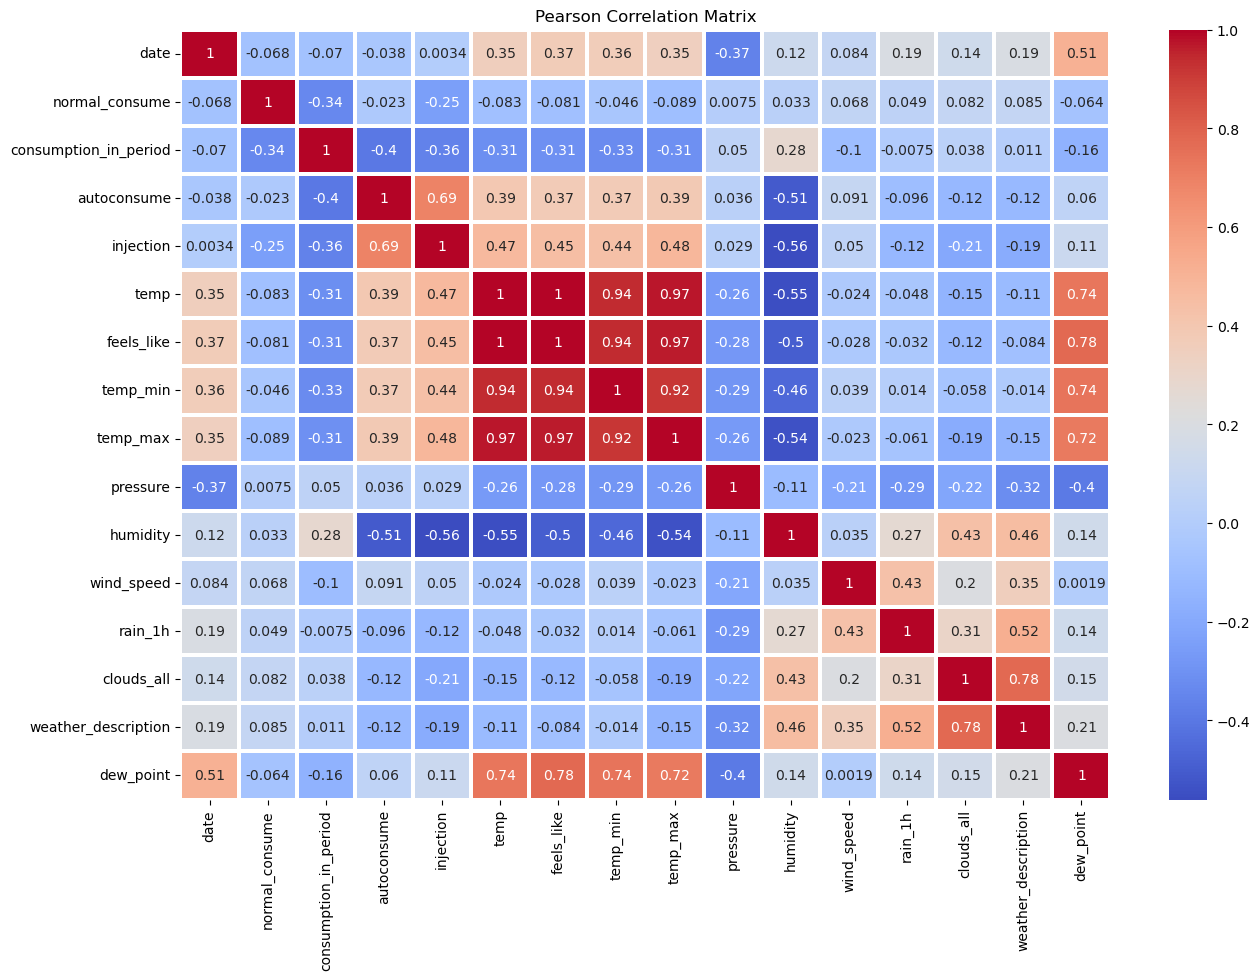

In [18]:
correlation_matrix = final.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=1.5)
plt.title("Pearson Correlation Matrix")
plt.show()

                  Feature  Mutual_Information
2             autoconsume            0.503837
1   consumption_in_period            0.198639
0          normal_consume            0.195063
8                humidity            0.171044
5                temp_min            0.138669
6                temp_max            0.136732
3                    temp            0.131156
4              feels_like            0.113485
11             clouds_all            0.031230
12    weather_description            0.030233
13              dew_point            0.025399
10                rain_1h            0.018220
7                pressure            0.014224
9              wind_speed            0.014102


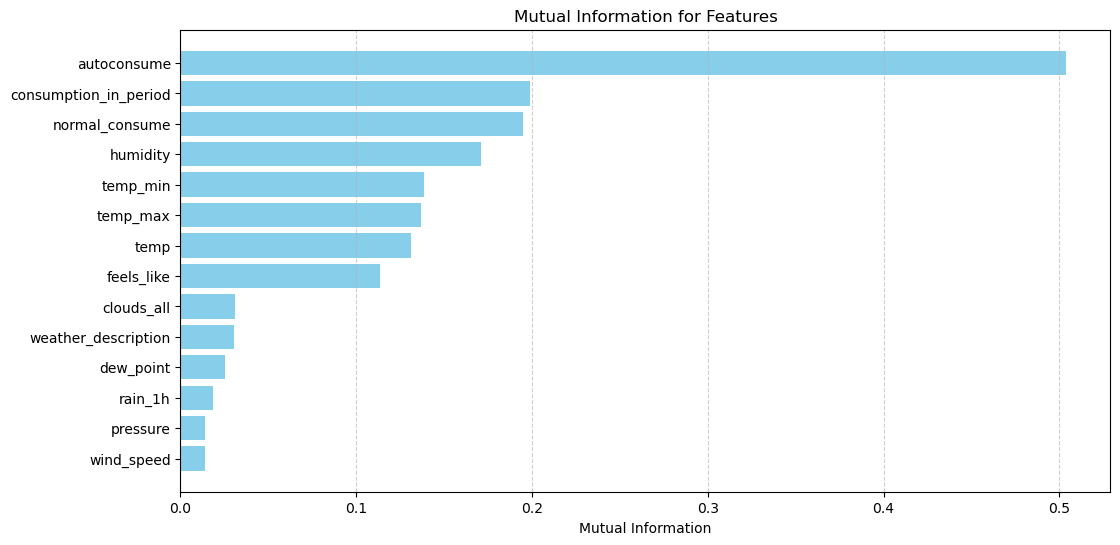

In [19]:
final2 = final.drop(['date'], axis=1)

target = final2['injection']

# Drop the target columns from the features
features = final2.drop(['injection'], axis=1)

# Calculate mutual information for each feature with respect to the target variables
mi = mutual_info_classif(features, target, discrete_features='auto', random_state=2024)

# Create DataFrames to show the results
mi_results = pd.DataFrame({'Feature': features.columns, 'Mutual_Information': mi})

# Display the results
print(mi_results.sort_values(by='Mutual_Information', ascending=False))

# Order the features by mutual information for 'smoking_state'
sorted_mi = mi_results.sort_values(by='Mutual_Information', ascending=False)

# Plot for 'smoking_state'
plt.figure(figsize=(12, 6))
plt.barh(sorted_mi['Feature'], sorted_mi['Mutual_Information'], color='skyblue')
plt.xlabel('Mutual Information')
plt.title('Mutual Information for Features')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.gca().invert_yaxis()
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [20]:
final = final.drop(['pressure', 'wind_speed'], axis=1)
final_teste = final_teste.drop(['pressure', 'wind_speed'], axis=1)

<h3 style="font-family: 'Times New Roman'">Descriptive Statistics Before Pre-Processing</h3>

<h3 style="font-family: 'Times New Roman'">Basic Plots</h3>

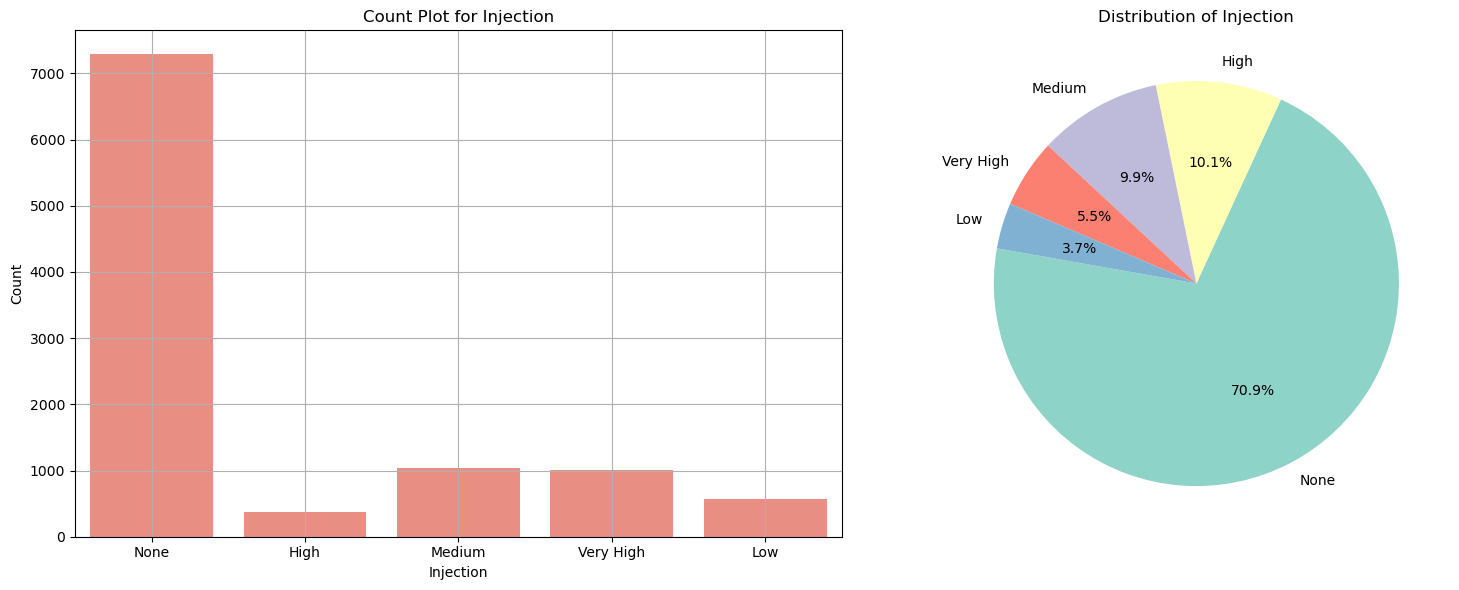

In [21]:
variable_name = 'injection'

final['injection'] = final['injection'].replace({
    'None': 0,
    'Low': 1,
    'Medium': 2,
    'High': 3,
    'Very High': 4
})

aux = ['None', 'High', 'Medium', 'Very High', 'Low']

# Count the occurrences of each weather description
injection_counts = final['injection'].value_counts()

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Count plot
sns.countplot(x=final[variable_name].replace({v: i for i, v in enumerate(aux)}), color='salmon', ax=axes[0])
axes[0].set_xticklabels(aux)
axes[0].set_xlabel(f'{variable_name.capitalize()}')
axes[0].set_ylabel('Count')
axes[0].set_title(f'Count Plot for {variable_name.capitalize()}')
axes[0].grid(True)


# Pie chart
axes[1].pie(injection_counts, labels=aux, autopct='%1.1f%%', startangle=170, colors=plt.cm.Set3.colors)
axes[1].set_title('Distribution of Injection')

plt.tight_layout()
plt.show()

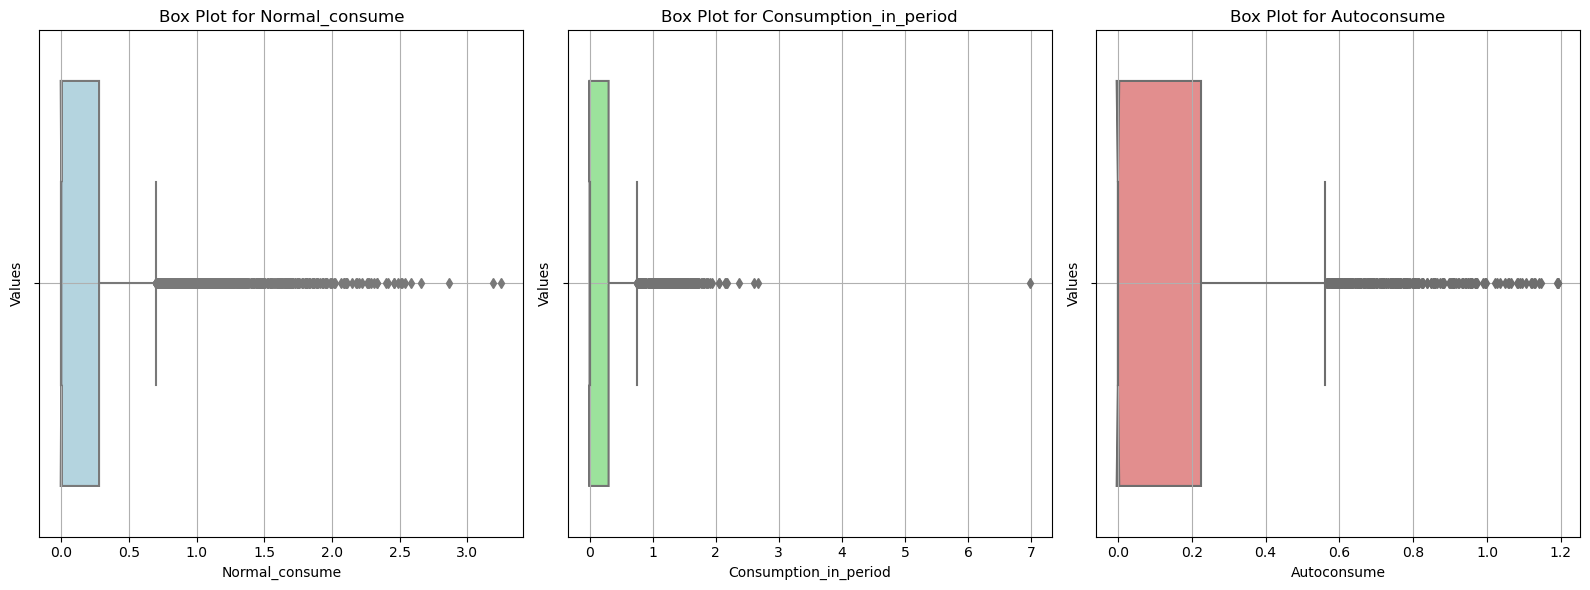

In [22]:
# First Boxplot
variable_name_1 = 'normal_consume'
plt.figure(figsize=(16, 6))
plt.subplot(1, 3, 1)  # 1 row, 3 columns, first subplot
sns.boxplot(x=final[variable_name_1], color='lightblue', notch=True)
plt.xlabel(f'{variable_name_1.capitalize()}')
plt.ylabel('Values')
plt.title(f'Box Plot for {variable_name_1.capitalize()}')
plt.grid(True)

# Second Boxplot
variable_name_2 = 'consumption_in_period'
plt.subplot(1, 3, 2)  # 1 row, 3 columns, second subplot
sns.boxplot(x=final[variable_name_2], color='lightgreen', notch=True)
plt.xlabel(f'{variable_name_2.capitalize()}')
plt.ylabel('Values')
plt.title(f'Box Plot for {variable_name_2.capitalize()}')
plt.grid(True)

# Third Boxplot
variable_name_3 = 'autoconsume'
plt.subplot(1, 3, 3)  # 1 row, 3 columns, third subplot
sns.boxplot(x=final[variable_name_3], color='lightcoral', notch=True)
plt.xlabel(f'{variable_name_3.capitalize()}')
plt.ylabel('Values')
plt.title(f'Box Plot for {variable_name_3.capitalize()}')
plt.grid(True)

plt.tight_layout()  # Adjust layout for better spacing
plt.show()


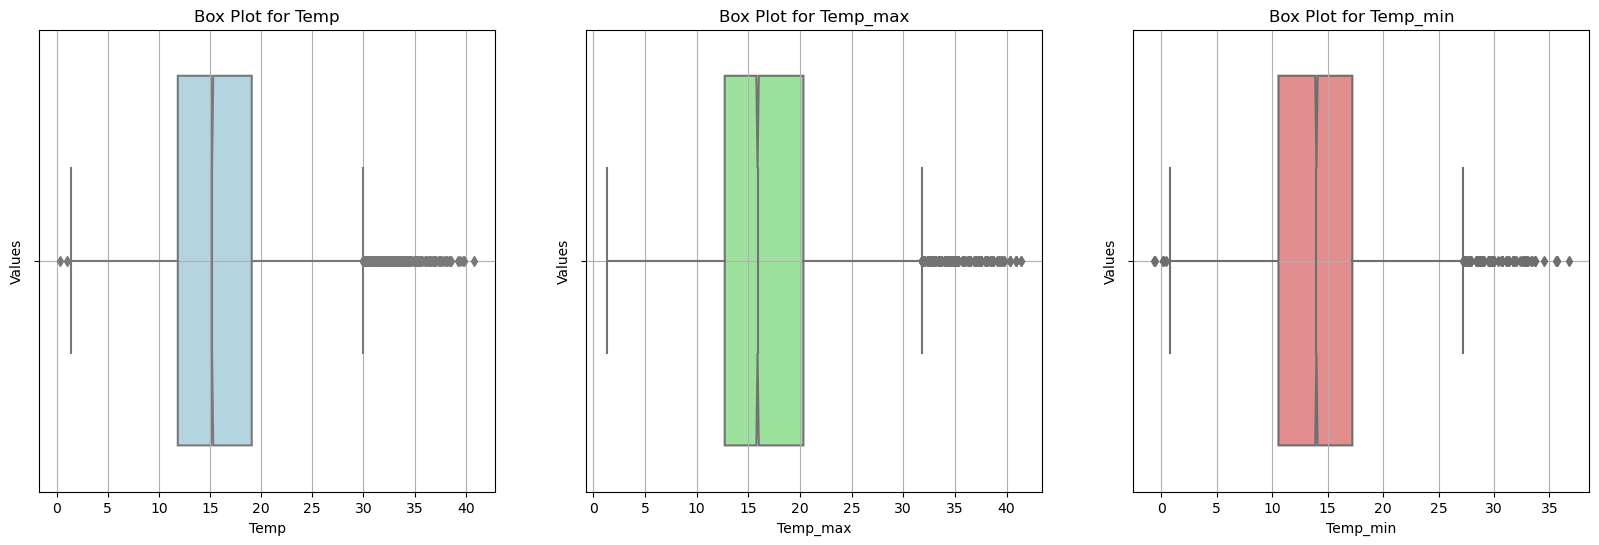

In [23]:
# Define the list of variable names and corresponding colors
variable_colors = {'temp': 'lightblue', 'temp_max': 'lightgreen', 'temp_min': 'lightcoral'}

# Create subplots
fig, axes = plt.subplots(1, len(variable_colors), figsize=(20, 6))

# Plot each box plot with a different color
for i, (variable_name, color) in enumerate(variable_colors.items()):
    sns.boxplot(x=final[variable_name], color=color, notch=True, ax=axes[i])
    axes[i].set_xlabel(f'{variable_name.capitalize()}')
    axes[i].set_ylabel('Values')
    axes[i].set_title(f'Box Plot for {variable_name.capitalize()}')
    axes[i].grid(True)

plt.show()

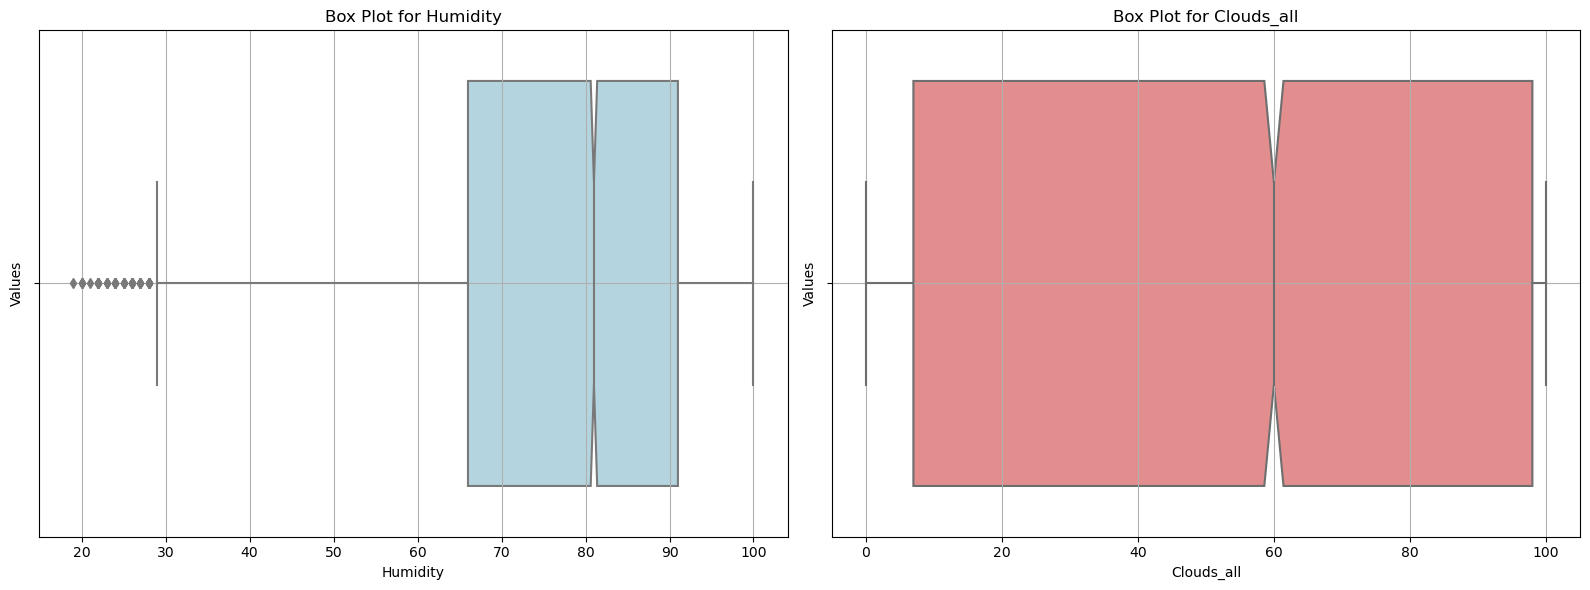

In [24]:
# First Boxplot
variable_name_1 = 'humidity'
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
sns.boxplot(x=final[variable_name_1], color='lightblue', notch=True)
plt.xlabel(f'{variable_name_1.capitalize()}')
plt.ylabel('Values')
plt.title(f'Box Plot for {variable_name_1.capitalize()}')
plt.grid(True)

# Second Boxplot
variable_name_2 = 'clouds_all'
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
sns.boxplot(x=final[variable_name_2], color='lightcoral', notch=True)
plt.xlabel(f'{variable_name_2.capitalize()}')
plt.ylabel('Values')
plt.title(f'Box Plot for {variable_name_2.capitalize()}')
plt.grid(True)

plt.tight_layout()  # Adjust layout for better spacing
plt.show()

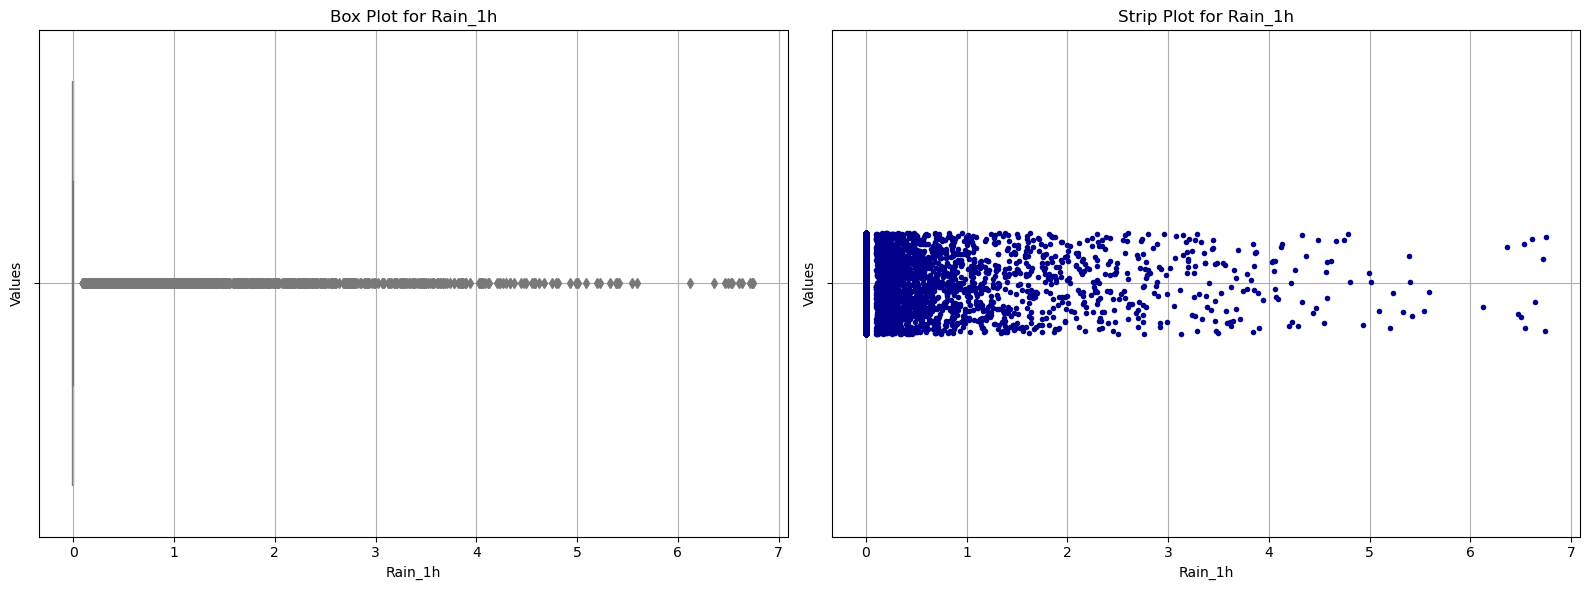

In [25]:
variable_name = 'rain_1h'

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Box plot
sns.boxplot(x=final[variable_name], color='lightblue', notch=True, ax=axes[0])
axes[0].set_xlabel(f'{variable_name.capitalize()}')
axes[0].set_ylabel('Values')
axes[0].set_title(f'Box Plot for {variable_name.capitalize()}')
axes[0].grid(True)

# Strip plot
sns.stripplot(x=final[variable_name], color='darkblue', size=4, jitter=True, ax=axes[1])
axes[1].set_xlabel(f'{variable_name.capitalize()}')
axes[1].set_ylabel('Values')
axes[1].set_title(f'Strip Plot for {variable_name.capitalize()}')
axes[1].grid(True)

plt.tight_layout()
plt.show()

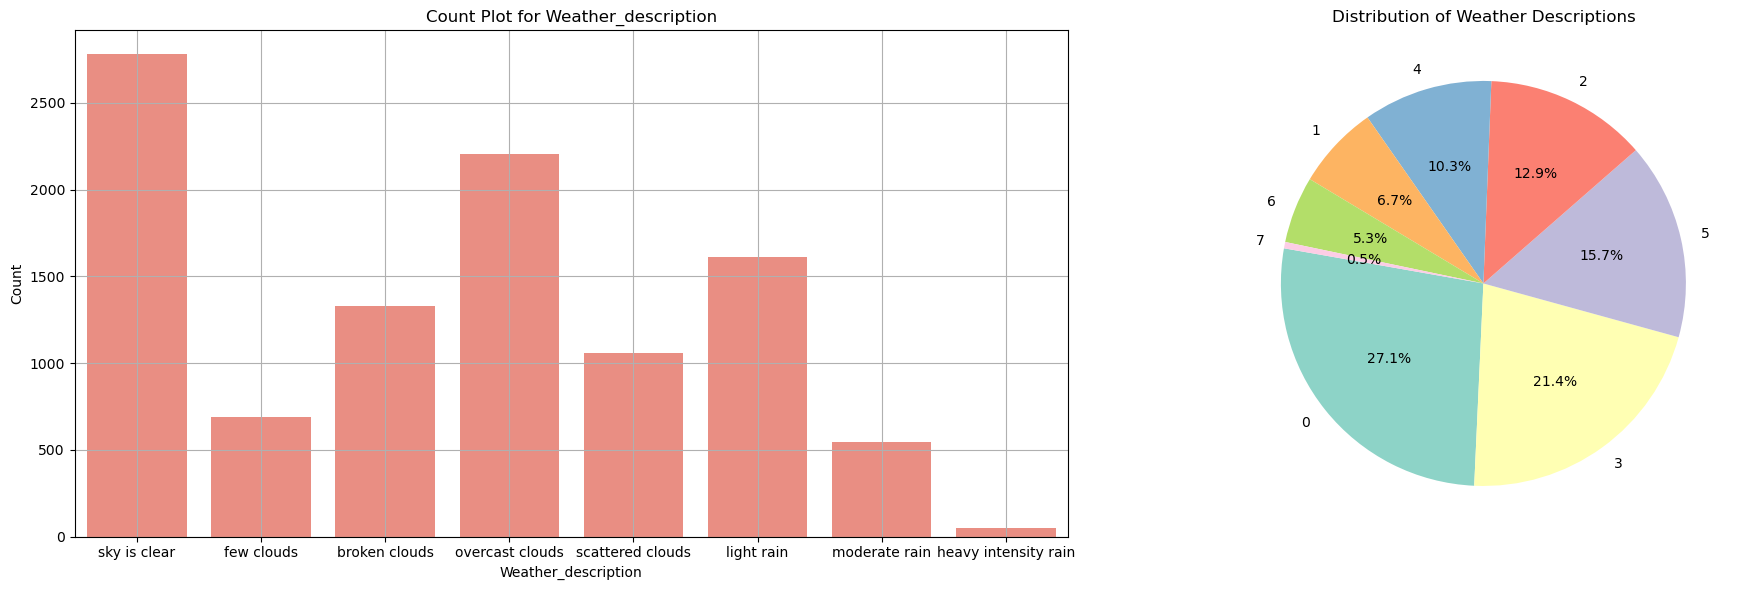

In [26]:
variable_name = 'weather_description'

final['weather_description'] = final['weather_description'].replace({
    'sky is clear': 0,
    'few clouds': 1,
    'broken clouds': 2,
    'overcast clouds': 3,
    'scattered clouds': 4,
    'light rain': 5,
    'moderate rain': 6,
    'heavy intensity rain': 7,
})

final_teste['weather_description'] = final_teste['weather_description'].replace({
    'sky is clear': 0,
    'few clouds': 1,
    'broken clouds': 2,
    'overcast clouds': 3,
    'scattered clouds': 4,
    'light rain': 5,
    'moderate rain': 6,
    'heavy intensity rain': 7,
})

aux = ['sky is clear', 'few clouds', 'broken clouds', 'overcast clouds', 'scattered clouds', 'light rain', 'moderate rain', 'heavy intensity rain']

# Count the occurrences of each weather description
weather_counts = final['weather_description'].value_counts()

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

# Count plot
sns.countplot(x=final[variable_name].replace({v: i for i, v in enumerate(aux)}), color='salmon', ax=axes[0])
axes[0].set_xticklabels(aux)
axes[0].set_xlabel(f'{variable_name.capitalize()}')
axes[0].set_ylabel('Count')
axes[0].set_title(f'Count Plot for {variable_name.capitalize()}')
axes[0].grid(True)

# Pie chart
axes[1].pie(weather_counts, labels=weather_counts.index, autopct='%1.1f%%', startangle=170, colors=plt.cm.Set3.colors)
axes[1].set_title('Distribution of Weather Descriptions')

plt.tight_layout()
plt.show()

<h3 style="font-family: 'Times New Roman'">Advanced Plots</h3>

In [27]:
feriado2021 = ['2021-01-01','2021-04-02','2021-04-04','2021-04-25','2021-05-01','2021-06-03','2021-06-10','2021-08-15','2021-10-05','2021-11-01','2021-12-01','2021-12-08','2021-12-25']
feriado2022 = ['2022-01-01','2022-04-15','2022-04-17','2022-04-25','2022-05-01','2022-06-10','2022-08-16','2022-08-15','2022-10-05','2022-11-01','2022-12-01','2022-12-08','2022-12-25']
feriado2023 = ['2023-01-01','2023-04-07','2023-04-09','2023-04-25','2023-05-01','2023-06-08','2023-06-10','2023-08-15','2023-10-05','2023-11-01','2023-12-01','2023-12-08','2023-12-25']

feriado = feriado2021+feriado2022+feriado2023

In [28]:
final['day'] = final['date'].dt.day
final['month'] = final['date'].dt.month
final['year'] = final['date'].dt.year

final['day_of_week'] = final['date'].dt.dayofweek
final['hour'] = pd.to_datetime(final['date']).dt.hour

final['isFeriado'] = final['date'].apply(lambda x: x.strftime('%Y-%m-%d')).apply(lambda x: x in feriado)
final['isFeriado'] = final['isFeriado'].astype(int)

In [29]:
final_teste['day'] = final_teste['date'].dt.day
final_teste['month'] = final_teste['date'].dt.month
final_teste['year'] = final_teste['date'].dt.year

final_teste['day_of_week'] = final_teste['date'].dt.dayofweek
final_teste['hour'] = pd.to_datetime(final_teste['date']).dt.hour

final_teste['isFeriado'] = final_teste['date'].apply(lambda x: x.strftime('%Y-%m-%d')).apply(lambda x: x in feriado)
final_teste['isFeriado'] = final_teste['isFeriado'].astype(int)

C:\Users\afons\AppData\Local\Temp\ipykernel_62328\2219851174.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sample['is_weekend'] = df_sample['date'].dt.dayofweek.isin([5, 6])


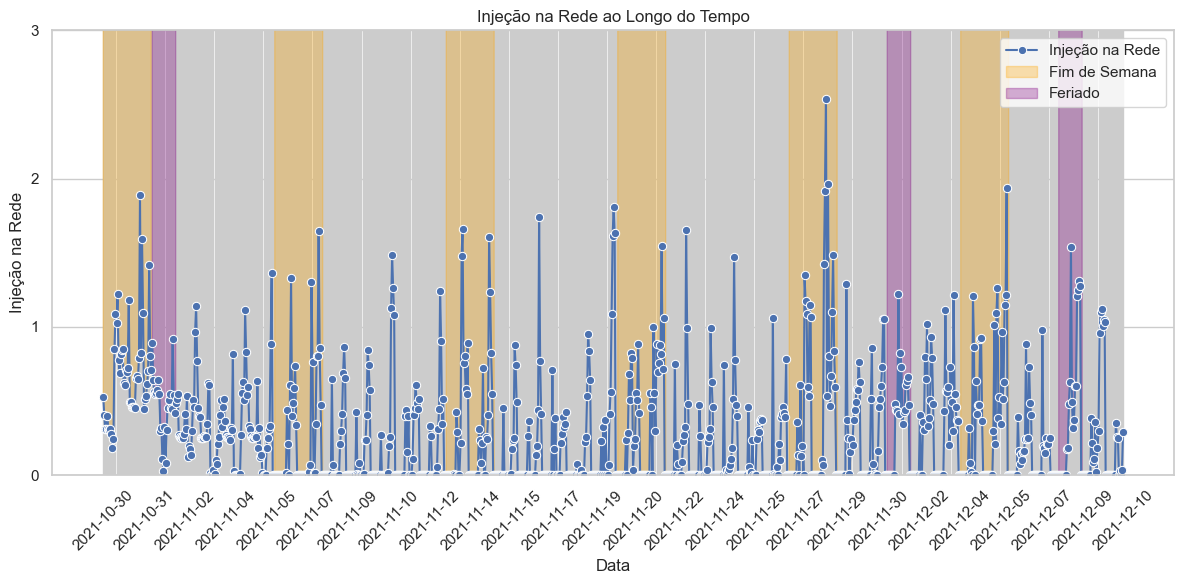

In [30]:
# Select the first 1000 rows
df_sample = final.head(1000)

df_sample['is_weekend'] = df_sample['date'].dt.dayofweek.isin([5, 6])

sns.set(style="whitegrid")

max_injection = df_sample['injection'].max()

plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='normal_consume', data=df_sample, marker='o', color='b', label='Injeção na Rede')
plt.fill_between(df_sample['date'], df_sample['normal_consume'], max_injection, where=df_sample['is_weekend'], color='orange', alpha=0.3, label='Fim de Semana')
plt.fill_between(df_sample['date'], df_sample['normal_consume'], max_injection, where=df_sample['isFeriado'], color='purple', alpha=0.3, label='Feriado')

plt.title('Injeção na Rede ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Injeção na Rede')
plt.xticks(rotation=45)

step = 40
n = len(df_sample)
labels = ['' if i % step != 0 and i != n - 1 else item for i, item in enumerate(df_sample['date'].dt.strftime('%Y-%m-%d'))]
plt.xticks(df_sample['date'], labels)

# Set y-axis limits and customize y-axis ticks
plt.ylim(0, 3)
plt.yticks([0, 1.0, 2.0, 3.0])  # Adjust y-axis ticks as needed

plt.legend()
plt.tight_layout()
plt.show()

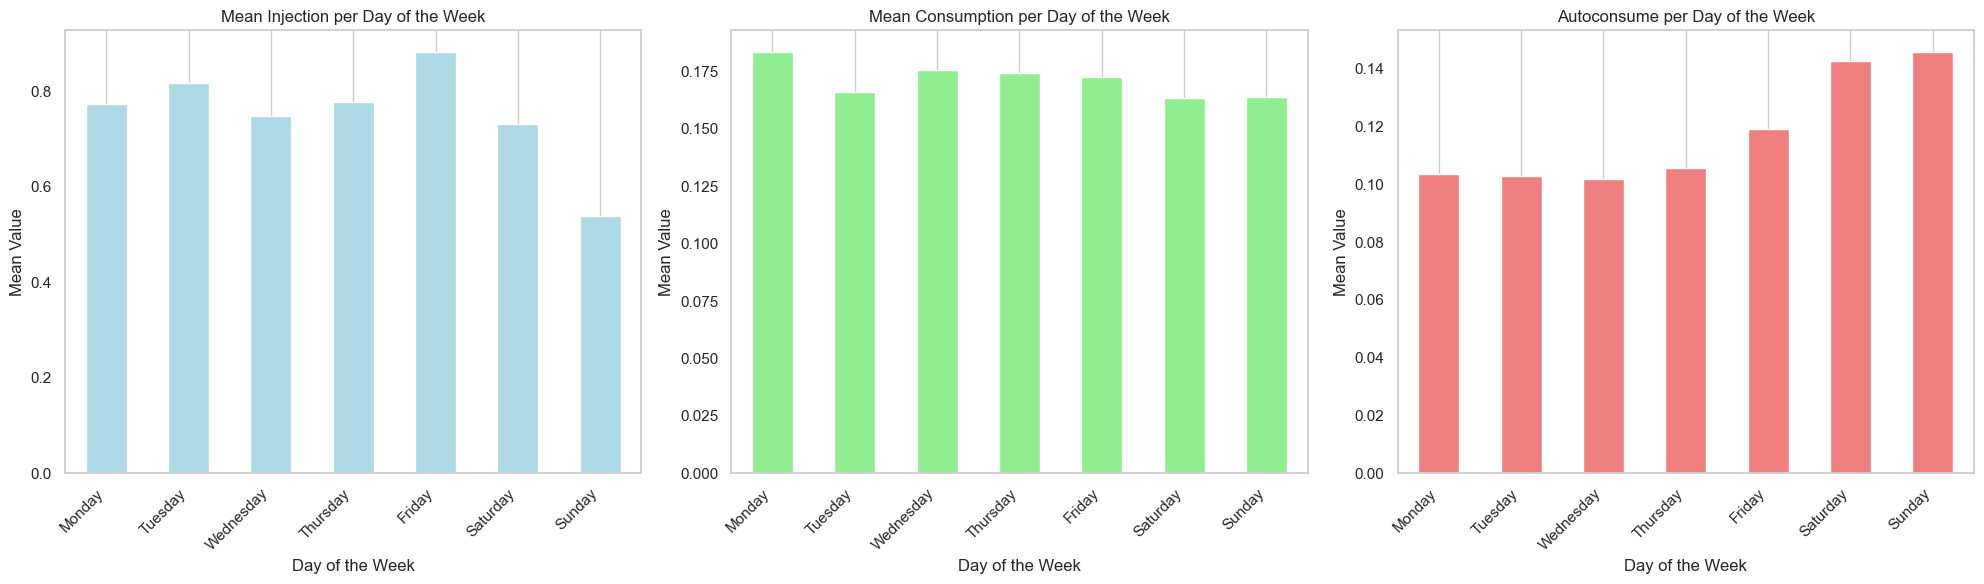

In [31]:
# Assuming you have 'autoconsume_please' column in your 'final' DataFrame
daily_avg_injection = final.groupby(['day_of_week'])['injection'].mean()
daily_avg_consumption = final.groupby(['day_of_week'])['consumption_in_period'].mean()
daily_avg_autoconsume = final.groupby(['day_of_week'])['autoconsume'].mean()

# Create a DataFrame with the values and use day names as index
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_avg_df = pd.DataFrame({
    'Injeção Média': daily_avg_injection.values,
    'Consumo Médio': daily_avg_consumption.values,
    'Autoconsume': daily_avg_autoconsume.values
}, index=day_order)

# Create subplots with three separate plots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))

# Plot for Injection
daily_avg_df['Injeção Média'].plot(kind='bar', color='lightblue', ax=ax1)
ax1.set_title('Mean Injection per Day of the Week')
ax1.set_xlabel('Day of the Week')
ax1.set_ylabel('Mean Value')
ax1.set_xticklabels(day_order, rotation=45, ha='right')
ax1.grid(axis='y')

# Plot for Consumption
daily_avg_df['Consumo Médio'].plot(kind='bar', color='lightgreen', ax=ax2)
ax2.set_title('Mean Consumption per Day of the Week')
ax2.set_xlabel('Day of the Week')
ax2.set_ylabel('Mean Value')
ax2.set_xticklabels(day_order, rotation=45, ha='right')
ax2.grid(axis='y')

# Plot for Autoconsume Please
daily_avg_df['Autoconsume'].plot(kind='bar', color='lightcoral', ax=ax3)
ax3.set_title('Autoconsume per Day of the Week')
ax3.set_xlabel('Day of the Week')
ax3.set_ylabel('Mean Value')
ax3.set_xticklabels(day_order, rotation=45, ha='right')
ax3.grid(axis='y')

plt.tight_layout()
plt.show()

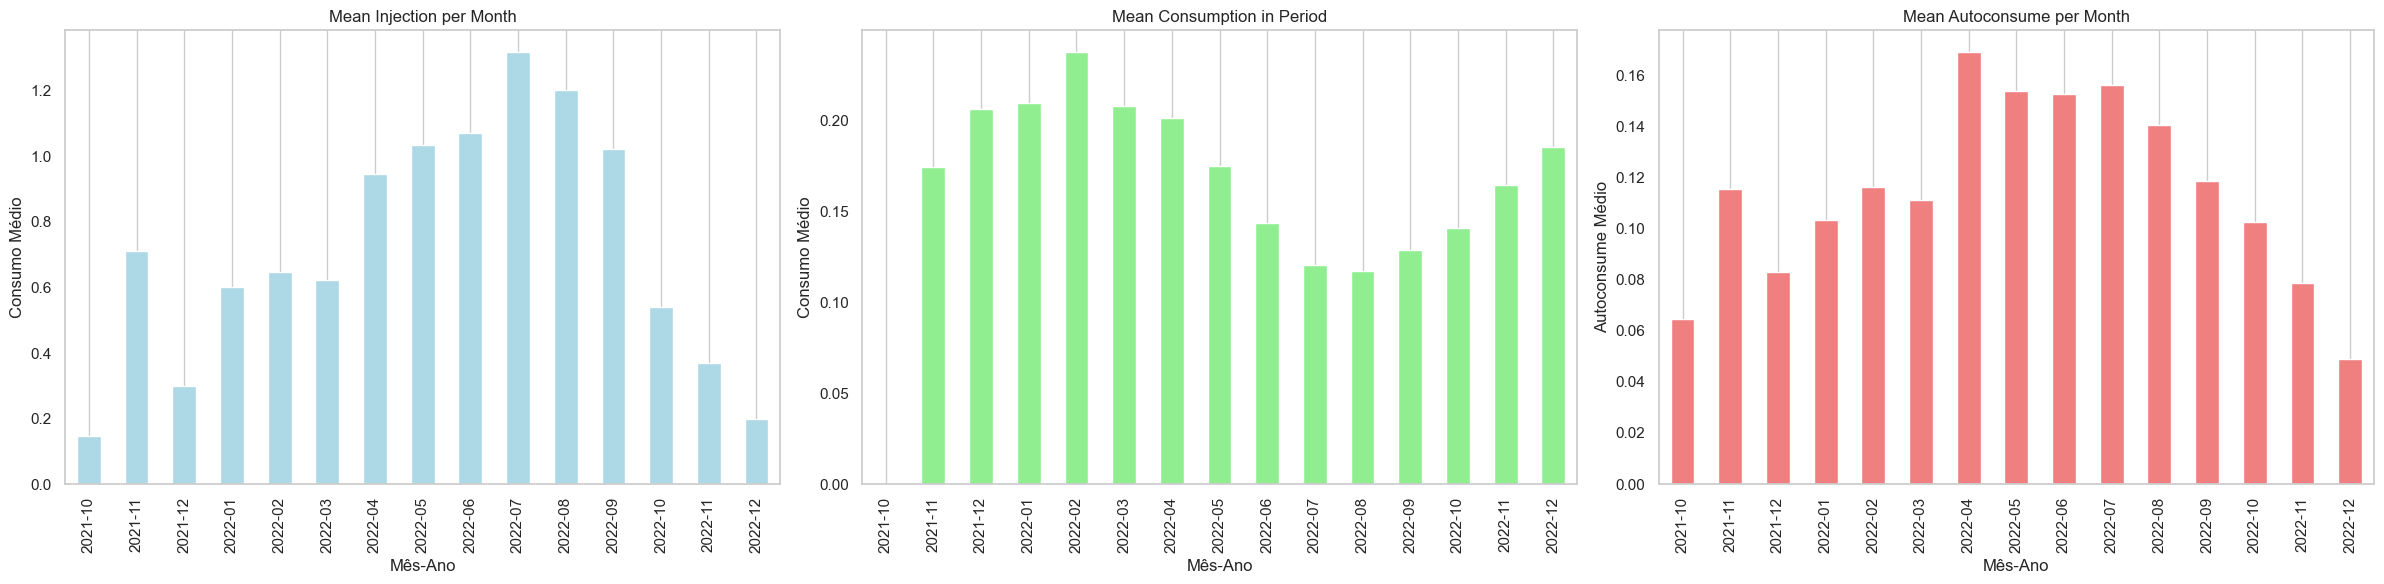

In [32]:
# Calcular a média de injeção e consumo por mês e ano
monthly_avg_injection = final.groupby(['year', 'month'])['injection'].mean()
monthly_avg_consumption = final.groupby(['year', 'month'])['consumption_in_period'].mean()
monthly_avg_autoconsume = final.groupby(['year', 'month'])['autoconsume'].mean()

# Criar um DataFrame com os valores agregados
monthly_avg_df = pd.DataFrame({
    'Injeção Média': monthly_avg_injection.values,
    'Consumo Médio': monthly_avg_consumption.values,
    'Autoconsume': monthly_avg_autoconsume.values
}, index=monthly_avg_injection.index)

# Criar um gráfico com três subtramas lado a lado
plt.figure(figsize=(24, 6))

# Primeira subtrama: Injeção Média por Mês
plt.subplot(131)
monthly_avg_df['Injeção Média'].plot(kind='bar', color='lightblue')
plt.title('Mean Injection per Month')
plt.xlabel('Mês-Ano')
plt.ylabel('Consumo Médio')
plt.xticks(range(len(monthly_avg_df)), [f'{y}-{m:02}' for y, m in monthly_avg_df.index])
plt.grid(axis='y')

# Segunda subtrama: Consumo Médio por Mês
plt.subplot(132)
monthly_avg_df['Consumo Médio'].plot(kind='bar', color='lightgreen')
plt.title('Mean Consumption in Period')
plt.xlabel('Mês-Ano')
plt.ylabel('Consumo Médio')
plt.xticks(range(len(monthly_avg_df)), [f'{y}-{m:02}' for y, m in monthly_avg_df.index])
plt.grid(axis='y')

# Terceira subtrama: Autoconsume por Mês
plt.subplot(133)
monthly_avg_df['Autoconsume'].plot(kind='bar', color='lightcoral')
plt.title('Mean Autoconsume per Month')
plt.xlabel('Mês-Ano')
plt.ylabel('Autoconsume Médio')
plt.xticks(range(len(monthly_avg_df)), [f'{y}-{m:02}' for y, m in monthly_avg_df.index])
plt.grid(axis='y')

plt.tight_layout()
plt.show()

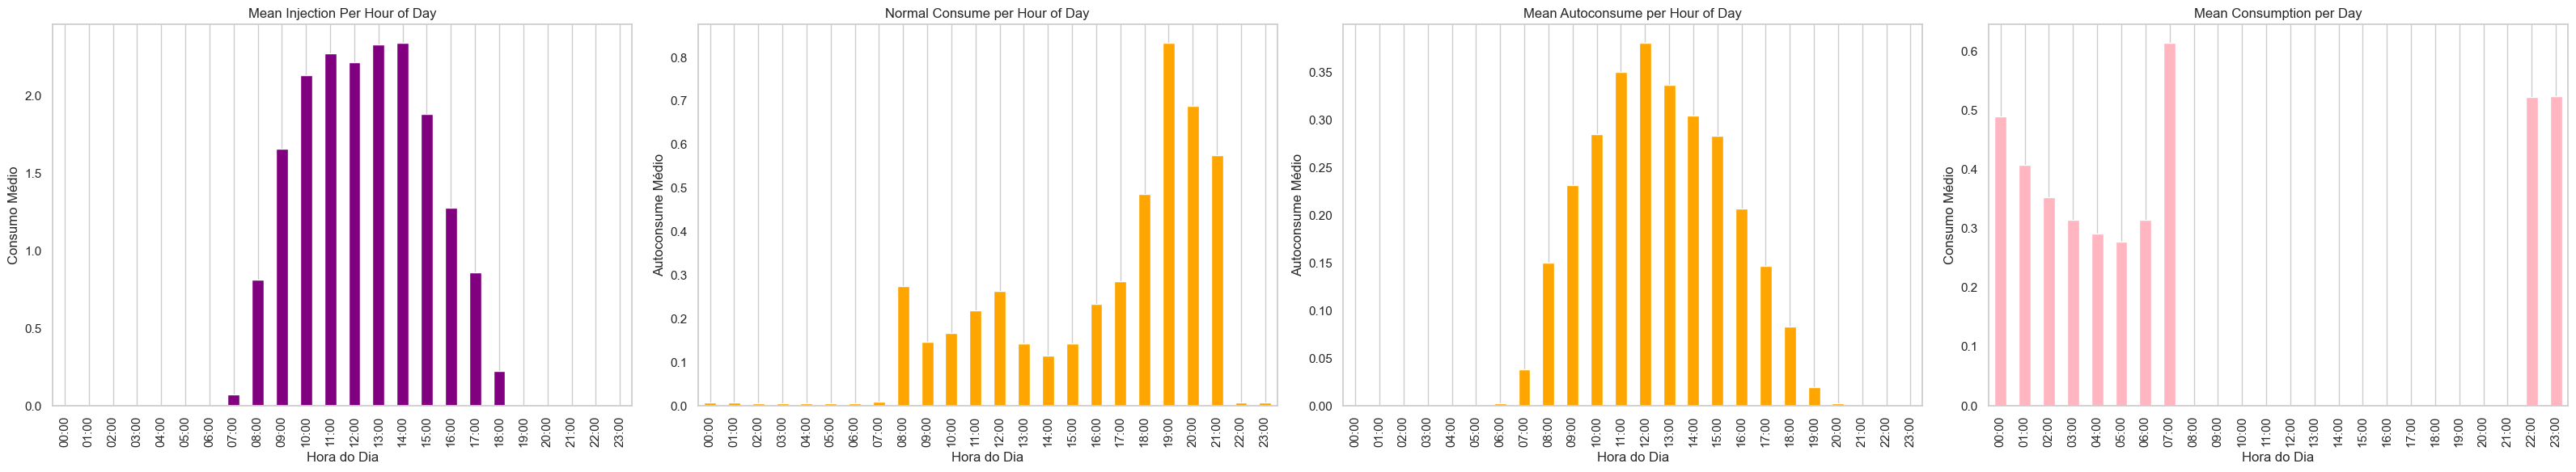

In [33]:
# Assuming 'hour_str' is a column in the 'final' DataFrame
final['hour'] = final['date'].dt.hour.apply(lambda x: str(x).zfill(2))
final['hour_str'] = final['hour'].astype(str) + ':00'

# Define a custom order for hours
custom_order = [f'{i:02d}:00' for i in range(24)]

# Convert 'hour_str' to categorical with custom order
final['hour_str'] = pd.Categorical(final['hour_str'], categories=custom_order, ordered=True)

final_teste['hour'] = final_teste['date'].dt.hour.apply(lambda x: str(x).zfill(2))
final_teste['hour_str'] = final_teste['hour'].astype(str) + ':00'

# Define a custom order for hours
custom_order = [f'{i:02d}:00' for i in range(24)]

# Convert 'hour_str' to categorical with custom order
final_teste['hour_str'] = pd.Categorical(final_teste['hour_str'], categories=custom_order, ordered=True)

# Calculate the mean of injection, consumption, and autoconsume per hour
hourly_avg_injection = final.groupby('hour_str')['injection'].mean()
hourly_avg_consumption = final.groupby('hour')['consumption_in_period'].mean()
hourly_avg_autoconsume = final.groupby('hour_str')['autoconsume'].mean()
hourly_avg_normal_conume = final.groupby('hour_str')['normal_consume'].mean()


# Sorting the DataFrames by custom order
hourly_avg_injection = hourly_avg_injection.sort_index()
hourly_avg_autoconsume = hourly_avg_autoconsume.sort_index()

# Criar um DataFrame com os valores agregados
hourly_avg_df = pd.DataFrame({
    'Injeção Média': hourly_avg_injection.values,
    'Consumo Médio': hourly_avg_consumption.values,
    'Autoconsume': hourly_avg_autoconsume.values,
    'NormalConsume': hourly_avg_normal_conume.values
}, index=hourly_avg_injection.index)

# Criar um gráfico com quatro subtramas lado a lado
plt.figure(figsize=(32, 6))

# Primeira subtrama: Injeção Média por Hora
plt.subplot(141)
hourly_avg_df['Injeção Média'].plot(kind='bar', color='purple')
plt.title('Mean Injection Per Hour of Day')
plt.xlabel('Hora do Dia')
plt.ylabel('Consumo Médio')
plt.xticks(range(len(hourly_avg_df)), hourly_avg_df.index)
plt.grid(axis='y')

# Segunda subtrama: Consumo Médio por Hora
plt.subplot(144)
hourly_avg_df['Consumo Médio'].plot(kind='bar', color='lightpink')
plt.title('Mean Consumption per Day')
plt.xlabel('Hora do Dia')
plt.ylabel('Consumo Médio')
plt.xticks(range(len(hourly_avg_df)), hourly_avg_df.index)
plt.grid(axis='y')

# Terceira subtrama: Autoconsume por Hora
plt.subplot(143)
hourly_avg_df['Autoconsume'].plot(kind='bar', color='orange')
plt.title('Mean Autoconsume per Hour of Day')
plt.xlabel('Hora do Dia')
plt.ylabel('Autoconsume Médio')
plt.xticks(range(len(hourly_avg_df)), hourly_avg_df.index)
plt.grid(axis='y')

# Quarta subtrama: Adicione aqui o código para o quarto gráfico
plt.subplot(142)
hourly_avg_df['NormalConsume'].plot(kind='bar', color='orange')
plt.title('Normal Consume per Hour of Day')
plt.xlabel('Hora do Dia')
plt.ylabel('Autoconsume Médio')
plt.xticks(range(len(hourly_avg_df)), hourly_avg_df.index)
plt.grid(axis='y')
# Seu código para o quarto gráfico aqui

plt.tight_layout()
plt.show()

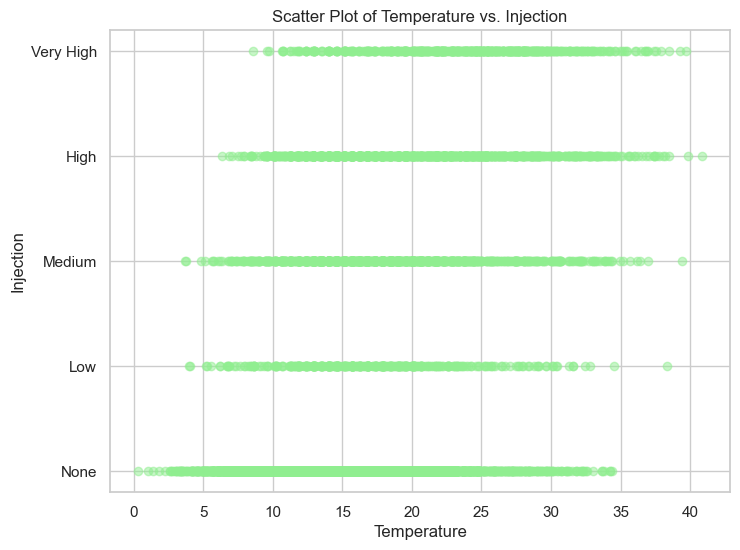

In [34]:
# Define the custom y-axis labels
y_labels = ['None', 'Low', 'Medium', 'High', 'Very High']

# Create a scatter plot to visualize the correlation
plt.figure(figsize=(8, 6))
plt.scatter(final['temp'], final['injection'], alpha=0.5, c='lightgreen')
plt.title('Scatter Plot of Temperature vs. Injection')
plt.xlabel('Temperature')
plt.ylabel('Injection')
plt.yticks(range(5), y_labels)  # Set custom y-axis labels
plt.grid(True)
plt.show()


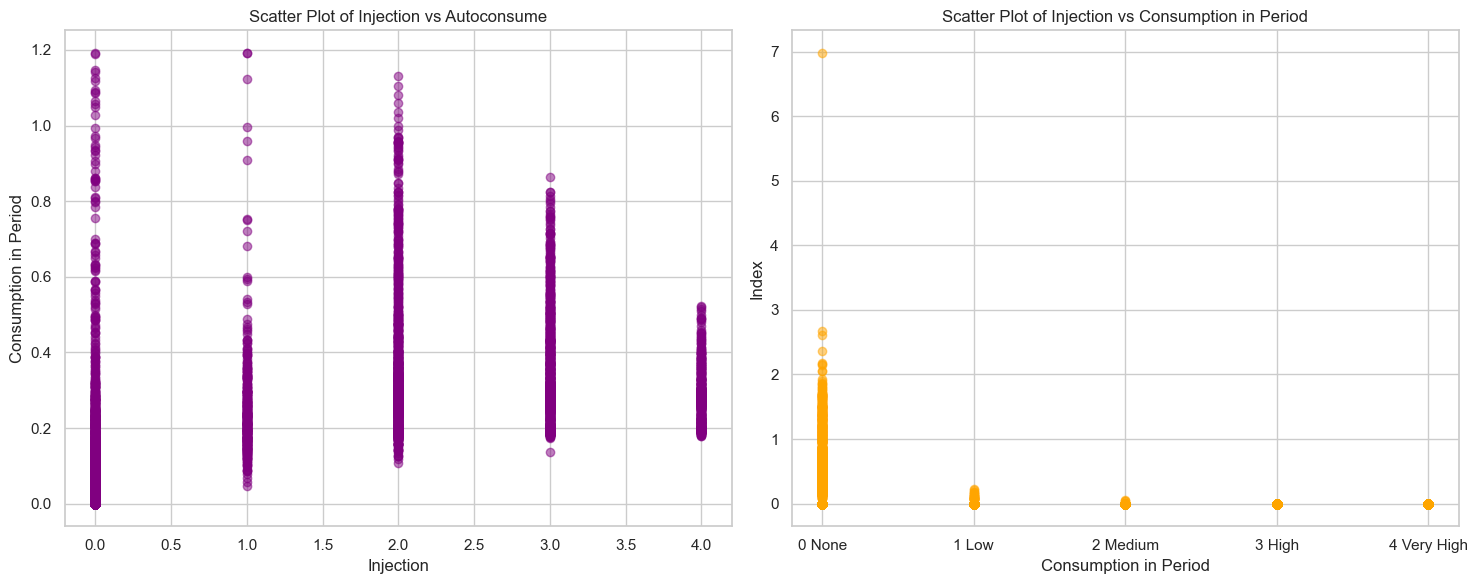

In [35]:
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.scatter(final['injection'], final['autoconsume'], alpha=0.5, c='purple')
plt.title('Scatter Plot of Injection vs Autoconsume')
plt.xlabel('Injection')
plt.ylabel('Consumption in Period')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.scatter(final['injection'], final['consumption_in_period'], alpha=0.5, c='orange') 
plt.title('Scatter Plot of Injection vs Consumption in Period')
plt.xlabel('Consumption in Period')
plt.ylabel('Index') 

# Customize x-axis labels for both subplots
consumption_labels = ['0 None', '1 Low', '2 Medium', '3 High', '4 Very High']
plt.xticks(range(len(consumption_labels)), consumption_labels)

plt.grid(True)

# Adjust layout
plt.tight_layout()
plt.show()

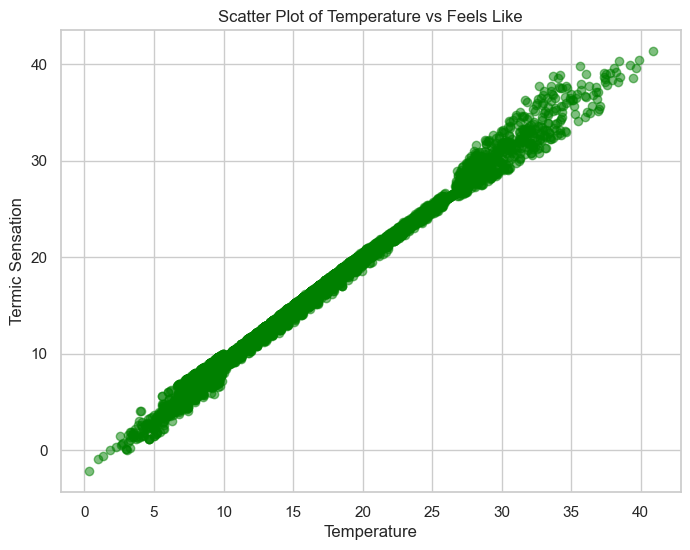

In [36]:
# Create a scatter plot to visualize the correlation
plt.figure(figsize=(8, 6))
plt.scatter(final['temp'], final['feels_like'], alpha=0.5, c='green')
plt.title('Scatter Plot of Temperature vs Feels Like')
plt.xlabel('Temperature')
plt.ylabel('Termic Sensation')
plt.grid(True)
plt.show()

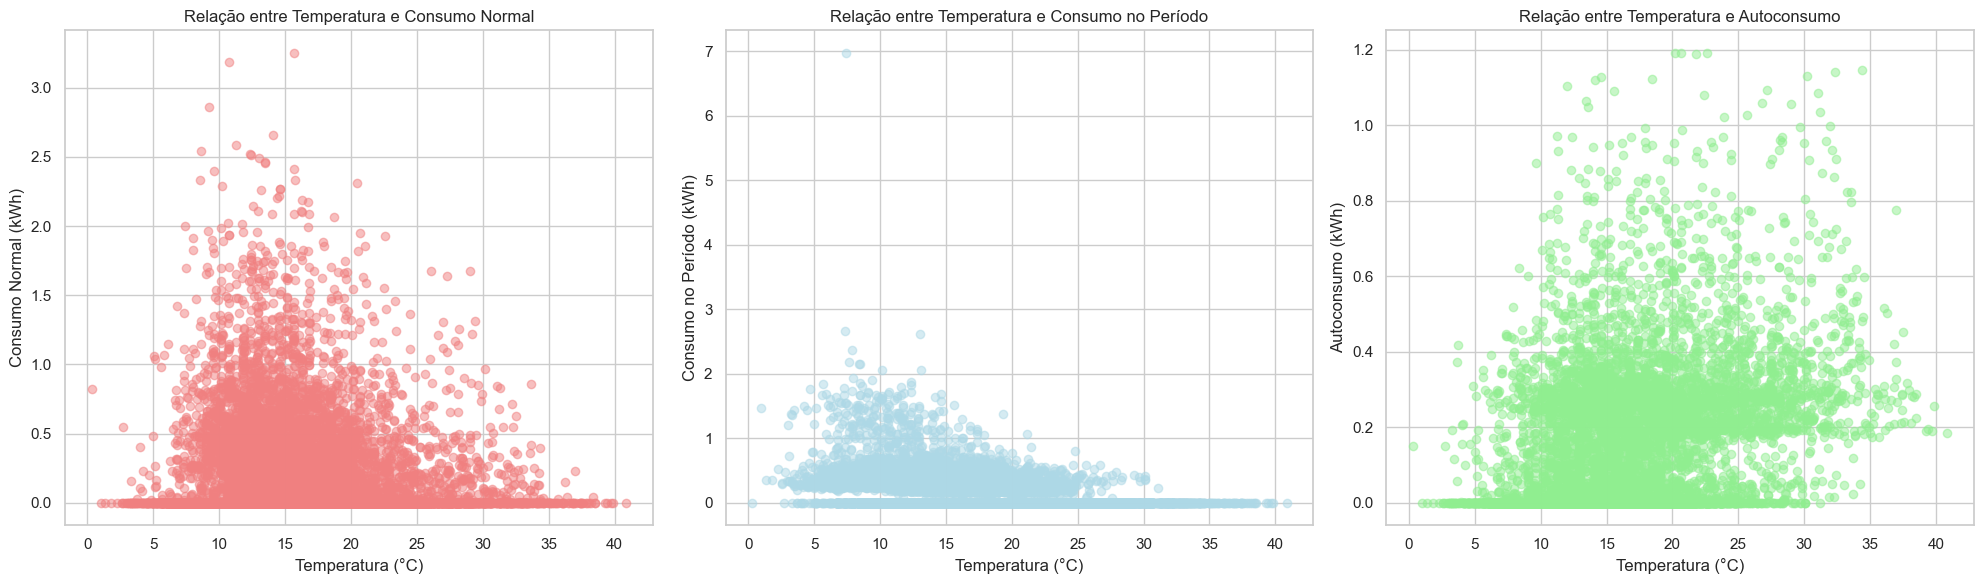

In [37]:
plt.figure(figsize=(20, 6))

# First subplot
plt.subplot(1, 3, 1)
plt.scatter(final['temp'], final['normal_consume'], alpha=0.5, color='lightcoral')
plt.title('Relação entre Temperatura e Consumo Normal')
plt.xlabel('Temperatura (°C)')
plt.ylabel('Consumo Normal (kWh)')
plt.grid(True)

# Second subplot
plt.subplot(1, 3, 2)
plt.scatter(final['temp'], final['consumption_in_period'], alpha=0.5, color='lightblue')
plt.title('Relação entre Temperatura e Consumo no Período')
plt.xlabel('Temperatura (°C)')
plt.ylabel('Consumo no Período (kWh)')
plt.grid(True)

# Third subplot
plt.subplot(1, 3, 3)
plt.scatter(final['temp'], final['autoconsume'], alpha=0.5, color='lightgreen')
plt.title('Relação entre Temperatura e Autoconsumo')
plt.xlabel('Temperatura (°C)')
plt.ylabel('Autoconsumo (kWh)')
plt.grid(True)

# Adjust layout
plt.tight_layout()
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

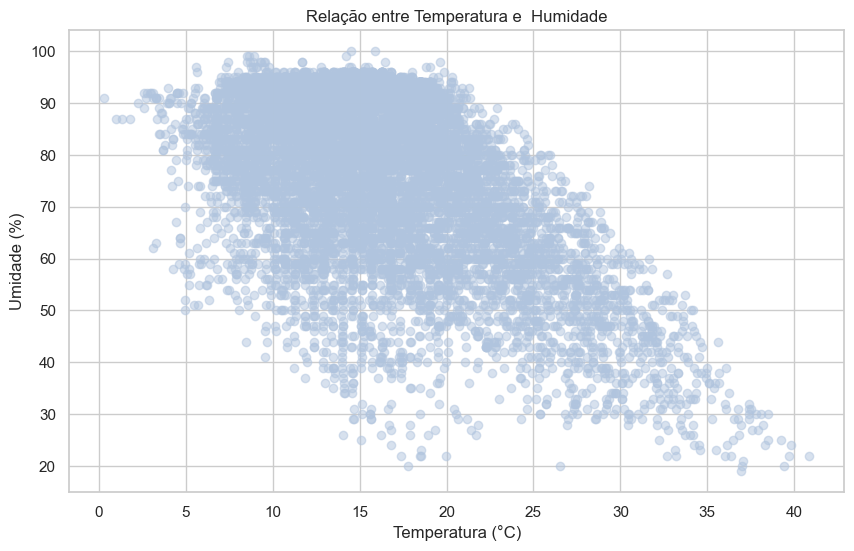

In [38]:
plt.figure(figsize=(10, 6))
plt.scatter(final['temp'], final['humidity'], alpha=0.5, color='lightsteelblue')
plt.title('Relação entre Temperatura e  Humidade')
plt.xlabel('Temperatura (°C)')
plt.ylabel('Umidade (%)')
plt.grid(True)
plt.show

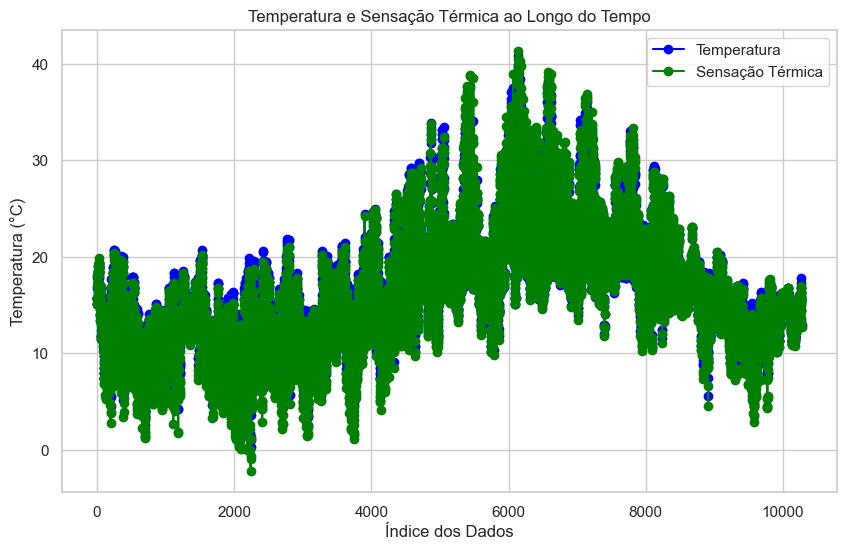

In [39]:
plt.figure(figsize=(10, 6))
plt.plot(final.index, final['temp'], marker='o', linestyle='-', color='blue', label='Temperatura')
plt.plot(final.index, final['feels_like'], marker='o', linestyle='-', color='green', label='Sensação Térmica')
plt.title('Temperatura e Sensação Térmica ao Longo do Tempo')
plt.xlabel('Índice dos Dados')
plt.ylabel('Temperatura (°C)')
plt.legend()
plt.grid(True)
plt.show()

In [40]:
feriado2021 = ['2021-01-01','2021-04-02','2021-04-04','2021-04-25','2021-05-01','2021-06-03','2021-06-10','2021-08-06','2021-08-07','2021-08-08','2021-15-08','2021-10-05','2021-11-01','2021-12-01','2021-12-08','2021-12-25']
feriado2022 = ['2022-01-01','2022-04-02','2022-04-04','2022-04-25','2022-05-01','2022-06-03','2022-06-10','2022-08-06','2022-08-07','2022-08-08','2022-15-08','2022-10-05','2022-11-01','2022-12-01','2022-12-08','2022-12-25']
feriado2023 = ['2023-01-01','2023-04-02','2023-04-04','2023-04-25','2023-05-01','2023-06-03','2023-06-10','2023-08-06','2023-08-07','2023-08-08','2023-15-08','2023-10-05','2023-11-01','2023-12-01','2023-12-08','2023-12-25']

feriado = feriado2021+feriado2022+feriado2023

In [41]:
final['date'] = pd.to_datetime(final['date'])
final['Data'] = pd.to_datetime(final['date'].dt.date)
final['isFeriado'] = final['Data'].apply(lambda x: x.strftime('%Y-%m-%d')).apply(lambda x: x in feriado)
final['isFeriado'] = final['isFeriado'].astype(int)

In [42]:
final_teste['date'] = pd.to_datetime(final_teste['date'])
final_teste['Data'] = pd.to_datetime(final_teste['date'].dt.date)
final_teste['isFeriado'] = final_teste['Data'].apply(lambda x: x.strftime('%Y-%m-%d')).apply(lambda x: x in feriado)
final_teste['isFeriado'] = final_teste['isFeriado'].astype(int)

C:\Users\afons\AppData\Local\Temp\ipykernel_62328\2552175296.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sample['is_weekend'] = df_sample['date'].dt.dayofweek.isin([5, 6])


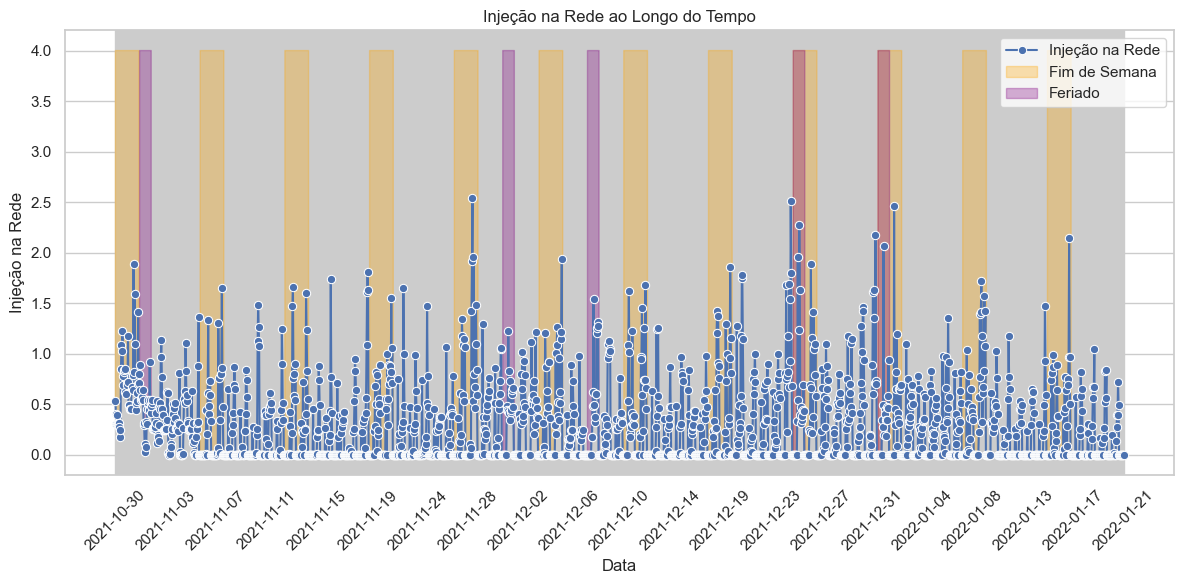

In [43]:
# Supondo que você já tenha um DataFrame chamado df com colunas 'date' e 'injection'
# Se você não tiver um DataFrame, substitua o trecho abaixo pelo carregamento do seu DataFrame.

# Select the first 1000 rows
df_sample = final.head(2000)

df_sample['is_weekend'] = df_sample['date'].dt.dayofweek.isin([5, 6])

# Set up the plot style using Seaborn (optional but enhances the appearance)
sns.set(style="whitegrid")

max_injection = df_sample['injection'].max()

# Create the visualization
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='normal_consume', data=df_sample, marker='o', color='b', label='Injeção na Rede')
plt.fill_between(df_sample['date'], df_sample['normal_consume'], max_injection, where=df_sample['is_weekend'], color='orange', alpha=0.3, label='Fim de Semana')
plt.fill_between(df_sample['date'], df_sample['normal_consume'], max_injection, where=df_sample['isFeriado'], color='purple', alpha=0.3, label='Feriado')

# Customize the plot
plt.title('Injeção na Rede ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Injeção na Rede')
plt.xticks(rotation=45)

# Adicionar legenda a cada 50 valores
step = 100
n = len(df_sample)
labels = ['' if i % step != 0 and i != n - 1 else item for i, item in enumerate(df_sample['Data'].dt.strftime('%Y-%m-%d'))]
plt.xticks(df_sample['date'], labels)

# Adicionar legenda
plt.legend()

# Exibir o gráfico
plt.tight_layout()
plt.show()

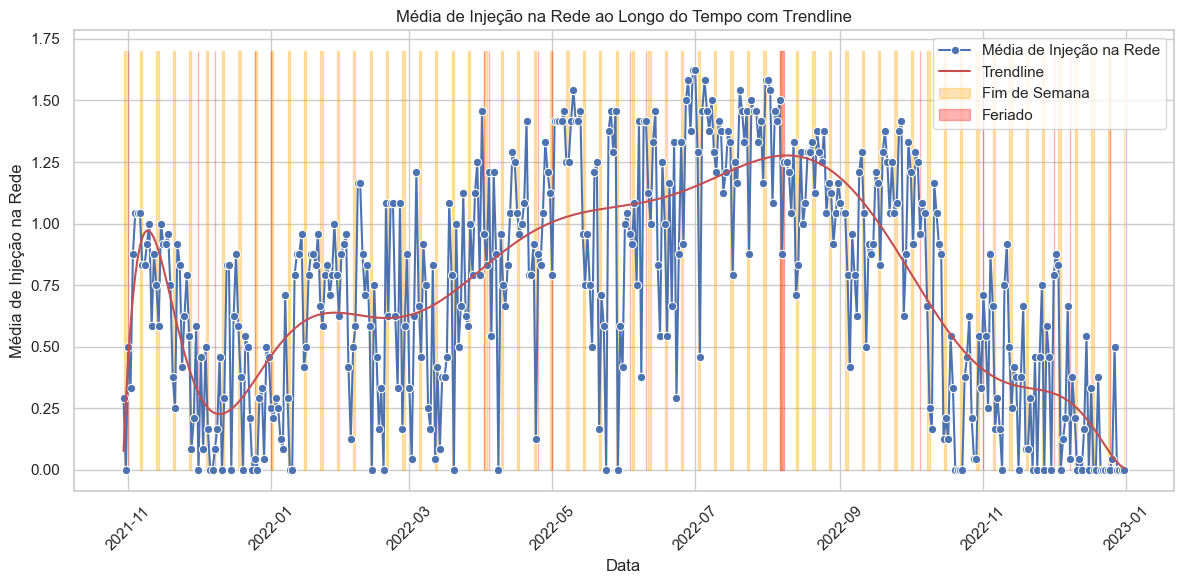

In [44]:
final['is_weekend'] = final['date'].dt.dayofweek.isin([5, 6])
final_teste['is_weekend'] = final_teste['date'].dt.dayofweek.isin([5, 6])
# final_teste['is_weekend'] = final_teste['date'].dt.dayofweek.isin([5, 6])
df_grouped = final.groupby('Data').agg({'injection': 'mean', 'is_weekend': 'sum', 'isFeriado': 'sum'}).reset_index()

coefficients = np.polyfit(df_grouped.index, df_grouped['injection'], 13)
polynomial = np.poly1d(coefficients)

# Generate x values for the trendline
x_values = np.linspace(df_grouped.index.min(), df_grouped.index.max(), 100)

# Calculate y values using the polynomial
y_values = polynomial(x_values)

# Set up the plot style using Seaborn (optional but enhances the appearance)
sns.set(style="whitegrid")

# Create the visualization
plt.figure(figsize=(12, 6))

# Plot the mean of 'injection' over time
sns.lineplot(x='Data', y='injection', data=df_grouped, marker='o', color='b', label='Média de Injeção na Rede')

# Plot the trendline
plt.plot(df_grouped['Data'], polynomial(df_grouped.index), label='Trendline', color='r')

# Highlight weekends with a shaded area
plt.fill_between(df_grouped['Data'], 0, 1.7, where=df_grouped['is_weekend'], color='orange', alpha=0.3, label='Fim de Semana')

# Highlight holidays with a shaded area
plt.fill_between(df_grouped['Data'], 0, 1.7, where=df_grouped['isFeriado'], color='red', alpha=0.3, label='Feriado')

# Customize the plot
plt.title('Média de Injeção na Rede ao Longo do Tempo com Trendline')
plt.xlabel('Data')
plt.ylabel('Média de Injeção na Rede')
plt.xticks(rotation=45)

# Add legend
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()

In [45]:
def get_season(month):
    if month in [12, 1, 2]:
        return 0  # Inverno
    elif month in [3, 4, 5]:
        return 1  # Primavera
    elif month in [6, 7, 8]:
        return 2  # Verão
    elif month in [9, 10, 11]:
        return 3  # Outono

# Aplicando a função à coluna de meses
final['Estacao_do_Ano'] = final['month'].apply(get_season)
final_teste['Estacao_do_Ano'] = final_teste['month'].apply(get_season)

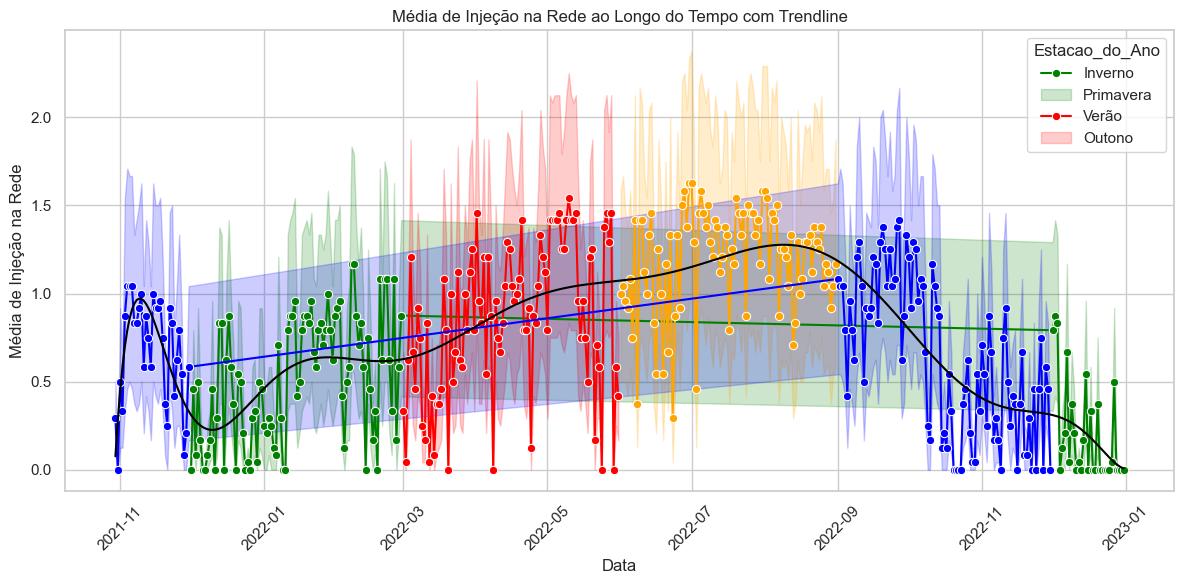

In [46]:
unique_estacao_values = final['Estacao_do_Ano'].unique()

df_grouped = final.groupby('Data').agg({'injection': 'mean', 'Estacao_do_Ano' : 'sum'}).reset_index()

# Create a palette dictionary with all unique values in 'Estacao_do_Ano'
season_colors = {estacao_value: color for estacao_value, color in zip(unique_estacao_values, ['blue', 'green', 'red', 'orange'])}
# Map season values to season names
season_names = {0: 'Inverno', 1: 'Primavera', 2: 'Verão', 3: 'Outono'}

# Create the visualization
plt.figure(figsize=(12, 6))

# Plot the mean of 'injection' over time
sns.lineplot(x='Data', y='injection', data=final, marker='o', hue='Estacao_do_Ano', palette=season_colors, label='Média de Injeção na Rede')

# Plot the trendline
plt.plot(df_grouped['Data'], polynomial(df_grouped.index), label='Trendline', color='black')

plt.title('Média de Injeção na Rede ao Longo do Tempo com Trendline')
plt.xlabel('Data')
plt.ylabel('Média de Injeção na Rede')
plt.xticks(rotation=45)

# Add legend with season names
plt.legend(title='Estacao_do_Ano', labels=[season_names[key] for key in season_names])

# Display the plot
plt.tight_layout()
plt.show()

In [47]:
intervalos = [('2022-12-19', '2023-01-01'),  # Natal 2022
              ('2021-12-19', '2022-01-02'),  # Natal 2021
              ('2022-04-11', '2022-04-18'),  # Páscoa 2022
              ]

#final['datetime'] = pd.to_datetime(final['date'])

# Função para verificar se a data está em pelo menos um dos intervalos
def data_em_pelo_menos_um_intervalo(data, intervalos):
    for inicio, fim in intervalos:
        intervalo = pd.to_datetime((inicio, fim))
        if pd.to_datetime(data).to_pydatetime() in pd.Interval(*intervalo):
            return 1
    return 0

# Adiciona uma coluna indicando se a data está em pelo menos um intervalo
final['vacaciones'] = final['date'].apply(lambda x: data_em_pelo_menos_um_intervalo(x, intervalos))

final_teste['vacaciones'] = final_teste['date'].apply(lambda x: data_em_pelo_menos_um_intervalo(x, intervalos))

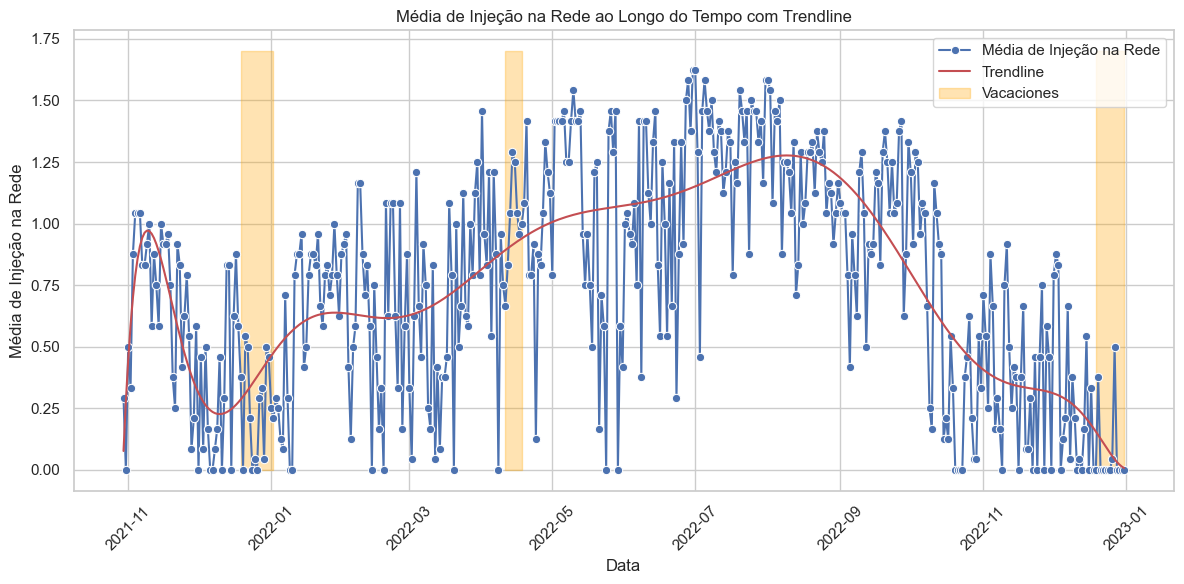

In [48]:
# final_teste['is_weekend'] = final_teste['date'].dt.dayofweek.isin([5, 6])
df_grouped = final.groupby('Data').agg({'injection': 'mean', 'vacaciones': 'sum'}).reset_index()

coefficients = np.polyfit(df_grouped.index, df_grouped['injection'], 13)
polynomial = np.poly1d(coefficients)

# Generate x values for the trendline
x_values = np.linspace(df_grouped.index.min(), df_grouped.index.max(), 100)

# Calculate y values using the polynomial
y_values = polynomial(x_values)

# Set up the plot style using Seaborn (optional but enhances the appearance)
sns.set(style="whitegrid")

# Create the visualization
plt.figure(figsize=(12, 6))

# Plot the mean of 'injection' over time
sns.lineplot(x='Data', y='injection', data=df_grouped, marker='o', color='b', label='Média de Injeção na Rede')

# Plot the trendline
plt.plot(df_grouped['Data'], polynomial(df_grouped.index), label='Trendline', color='r')

# Highlight weekends with a shaded area
plt.fill_between(df_grouped['Data'], 0, 1.7, where=df_grouped['vacaciones'], color='orange', alpha=0.3, label='Vacaciones')

# Customize the plot
plt.title('Média de Injeção na Rede ao Longo do Tempo com Trendline')
plt.xlabel('Data')
plt.ylabel('Média de Injeção na Rede')
plt.xticks(rotation=45)

# Add legend
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()

<h3 style="font-family: 'Times New Roman'">Save DataSet</h3>

In [49]:
final.to_csv("Ficheiros/Ficheiros_Pos_DataAnalysis_Before_PP/Final.csv", index=False)
final_teste.to_csv("Ficheiros/Ficheiros_Pos_DataAnalysis_Before_PP/Final_Teste.csv", index=False)